In [5]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)

In [2]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [3]:
myfolder = paste0(revision_folder, "CRM_association_outliers_betas/")

In [41]:
mygenes = list.files(myfolder,pattern = "betaGxC.csv")
length(mygenes)
head(mygenes)

[1] 19

[1] "ENSG00000008988_betaGxC.csv" "ENSG00000086062_betaGxC.csv"
[3] "ENSG00000089685_betaGxC.csv" "ENSG00000105426_betaGxC.csv"
[5] "ENSG00000108953_betaGxC.csv" "ENSG00000109475_betaGxC.csv"

In [35]:
gene = mygenes[1]
df0 = read.csv(paste0(myfolder,gene),row.names = 1)
# head(df0)
cells = rownames(df0)
length(cells)

[1] 33964

In [36]:
df = data.frame(cells = cells)
for (gene in mygenes){
#     print(gene)
    df_curr = read.csv(paste0(myfolder,gene),row.names = 1)
    colnames(df_curr) = gsub("X._","",colnames(df_curr))
    colnames(df_curr) = gsub("X.._","",colnames(df_curr))
#     print(head(df_curr))
    colnames(df_curr) = paste0(gsub("_betaGxC.csv","",gene),"-",colnames(df_curr))
    df = cbind(df, df_curr)
}
nrow(df)
ncol(df)
head(df)

[1] 33964

[1] 68

cells       ENSG00000008988-8_56910701_G_A
21843_1#10  21843_1#10  0                             
21843_1#100 21843_1#100 0                             
21843_1#101 21843_1#101 0                             
21843_1#102 21843_1#102 0                             
21843_1#103 21843_1#103 0                             
21843_1#105 21843_1#105 0                             
            ENSG00000086062-9_33025503_G_A ENSG00000086062-9_33160611_A_G
21843_1#10   0.01491052                     0.03449023                   
21843_1#100 -0.09030979                    -0.05768943                   
21843_1#101  0.08500414                     0.07539472                   
21843_1#102  0.14077671                     0.16514993                   
21843_1#103  0.07664767                     0.09574448                   
21843_1#105  0.07547678                     0.09764970                   
            ENSG00000086062-9_33163059_G_A ENSG00000086062-9_33163523_C_G
21843_1#10   0.03449023                     0.03449023                   
21843_1#100 -0.05768943                    -0.05768943                   
21843_1#101  0.07539472                     0.07539472                   
21843_1#102  0.16514993                     0.16514993                   
21843_1#103  0.09574448                     0.09574448                   
21843_1#105  0.09764970                     0.09764970                   
            ENSG00000086062-9_33174642_G_A ENSG00000086062-9_33177053_T_C
21843_1#10   0.05370782                     0.05436184                   
21843_1#100 -0.02455176                    -0.02537577                   
21843_1#101  0.08171497                     0.10404917                   
21843_1#102  0.16854727                     0.17181571                   
21843_1#103  0.09780515                     0.09568474                   
21843_1#105  0.10659997                     0.11552388                   
            ENSG00000086062-9_33180747_G_A ENSG00000089685-17_76129339_C_A ...
21843_1#10   0.046668215                    0.03864281                     ...
21843_1#100 -0.008099287                    0.05227038                     ...
21843_1#101  0.115360920                   -0.32720821                     ...
21843_1#102  0.162375012                   -0.52991628                     ...
21843_1#103  0.091046503                   -0.44564613                     ...
21843_1#105  0.112094974                   -0.37924047                     ...
            ENSG00000172809-17_72255808_C_T ENSG00000181350-17_16308654_G_A
21843_1#10  0                                0.07892427                    
21843_1#100 0                               -0.12585580                    
21843_1#101 0                               -0.12959131                    
21843_1#102 0                                0.01614843                    
21843_1#103 0                               -0.03995037                    
21843_1#105 0                               -0.01861663                    
            ENSG00000181350-17_16411522_G_A ENSG00000256618-17_21974576_G_T
21843_1#10  0                               0                              
21843_1#100 0                               0                              
21843_1#101 0                               0                              
21843_1#102 0                               0                              
21843_1#103 0                               0                              
21843_1#105 0                               0                              
            ENSG00000256618-17_22018916_T_C ENSG00000269028-3_96248222_C_T
21843_1#10  0                               0                             
21843_1#100 0                               0                             
21843_1#101 0                               0                             
21843_1#102 0                               0                             
21843_1#103 0                               0                             
21843_

In [37]:
### MOFA factors across cells
df_mofas = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/mofa_logcounts_model_factors.csv", row.names = 1)
nrow(df_mofas)
head(df_mofas,2)

[1] 34256

MOFA1      MOFA2    MOFA3     MOFA4    MOFA5      MOFA6     
21843_1#10  -0.5977040 1.067436 0.0564961 1.347661  0.6407429  0.3378262
21843_1#100  0.2332847 2.137884 0.6468115 1.129460 -0.3527733 -0.0918056
            MOFA7      MOFA8       MOFA9     MOFA10     MOFA11     MOFA12    
21843_1#10  -0.4664193  0.01520844 0.2922428 -0.6327374 -0.5833180  0.4731209
21843_1#100  0.9241371 -0.37349156 1.7895933 -0.6592327  0.4622862 -0.1388127
            MOFA13     MOFA14     MOFA15     MOFA16     MOFA17     MOFA18   
21843_1#10   0.4548455 -0.9910469  0.9065298 -0.7866174  0.4459964 -1.810175
21843_1#100 -2.2209369  1.5540730 -1.5173632 -0.3502506 -0.1655910  1.199816
            MOFA19     MOFA20    
21843_1#10  -1.0397955 0.26804527
21843_1#100  0.7298591 0.04844414

In [38]:
df0 = df_mofas[,c("MOFA1","MOFA2")]
df0$cells = rownames(df0)

In [39]:
df1 = df
head(df1)

cells       ENSG00000008988-8_56910701_G_A
21843_1#10  21843_1#10  0                             
21843_1#100 21843_1#100 0                             
21843_1#101 21843_1#101 0                             
21843_1#102 21843_1#102 0                             
21843_1#103 21843_1#103 0                             
21843_1#105 21843_1#105 0                             
            ENSG00000086062-9_33025503_G_A ENSG00000086062-9_33160611_A_G
21843_1#10   0.01491052                     0.03449023                   
21843_1#100 -0.09030979                    -0.05768943                   
21843_1#101  0.08500414                     0.07539472                   
21843_1#102  0.14077671                     0.16514993                   
21843_1#103  0.07664767                     0.09574448                   
21843_1#105  0.07547678                     0.09764970                   
            ENSG00000086062-9_33163059_G_A ENSG00000086062-9_33163523_C_G
21843_1#10   0.03449023                     0.03449023                   
21843_1#100 -0.05768943                    -0.05768943                   
21843_1#101  0.07539472                     0.07539472                   
21843_1#102  0.16514993                     0.16514993                   
21843_1#103  0.09574448                     0.09574448                   
21843_1#105  0.09764970                     0.09764970                   
            ENSG00000086062-9_33174642_G_A ENSG00000086062-9_33177053_T_C
21843_1#10   0.05370782                     0.05436184                   
21843_1#100 -0.02455176                    -0.02537577                   
21843_1#101  0.08171497                     0.10404917                   
21843_1#102  0.16854727                     0.17181571                   
21843_1#103  0.09780515                     0.09568474                   
21843_1#105  0.10659997                     0.11552388                   
            ENSG00000086062-9_33180747_G_A ENSG00000089685-17_76129339_C_A ...
21843_1#10   0.046668215                    0.03864281                     ...
21843_1#100 -0.008099287                    0.05227038                     ...
21843_1#101  0.115360920                   -0.32720821                     ...
21843_1#102  0.162375012                   -0.52991628                     ...
21843_1#103  0.091046503                   -0.44564613                     ...
21843_1#105  0.112094974                   -0.37924047                     ...
            ENSG00000172809-17_72255808_C_T ENSG00000181350-17_16308654_G_A
21843_1#10  0                                0.07892427                    
21843_1#100 0                               -0.12585580                    
21843_1#101 0                               -0.12959131                    
21843_1#102 0                                0.01614843                    
21843_1#103 0                               -0.03995037                    
21843_1#105 0                               -0.01861663                    
            ENSG00000181350-17_16411522_G_A ENSG00000256618-17_21974576_G_T
21843_1#10  0                               0                              
21843_1#100 0                               0                              
21843_1#101 0                               0                              
21843_1#102 0                               0                              
21843_1#103 0                               0                              
21843_1#105 0                               0                              
            ENSG00000256618-17_22018916_T_C ENSG00000269028-3_96248222_C_T
21843_1#10  0                               0                             
21843_1#100 0                               0                             
21843_1#101 0                               0                             
21843_1#102 0                               0                             
21843_1#103 0                               0                             
21843_

Joining, by = "cells"
Joining, by = "cells"
Joining, by = "cells"


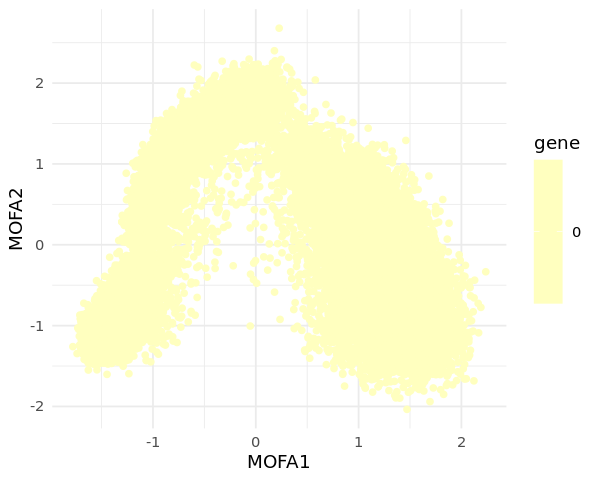

Joining, by = "cells"


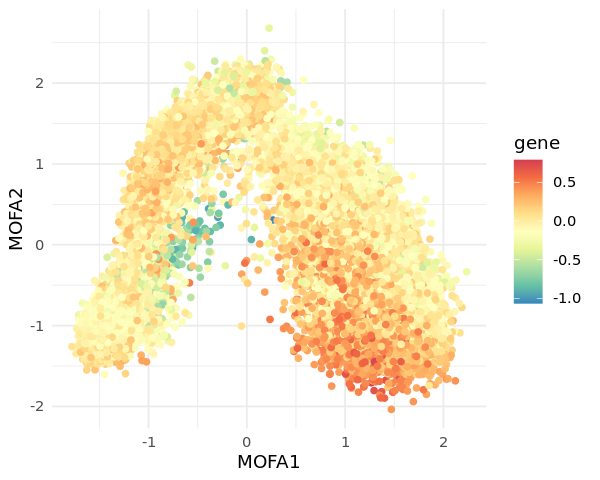

Joining, by = "cells"


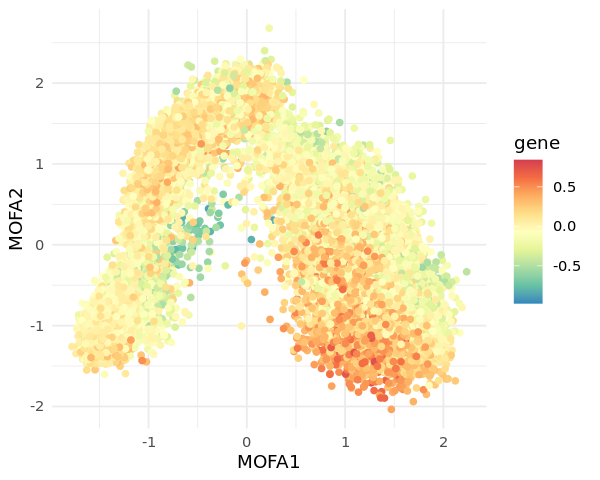

Joining, by = "cells"


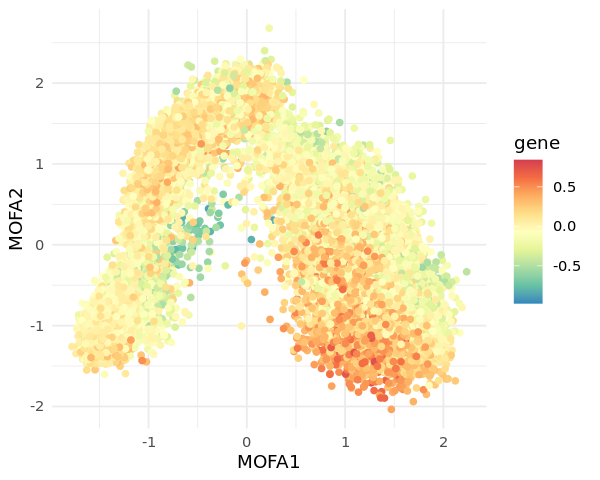

Joining, by = "cells"


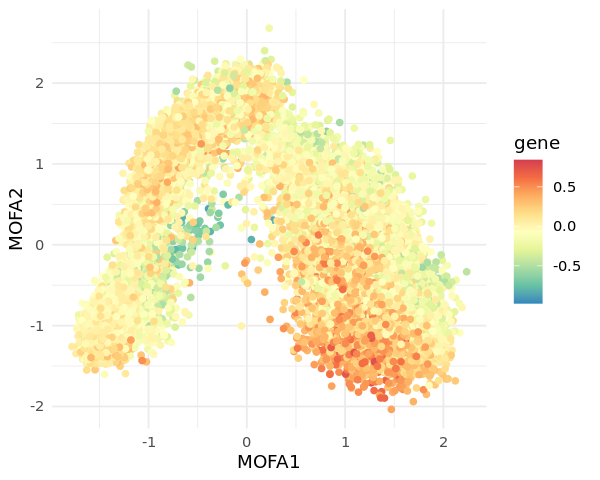

Joining, by = "cells"


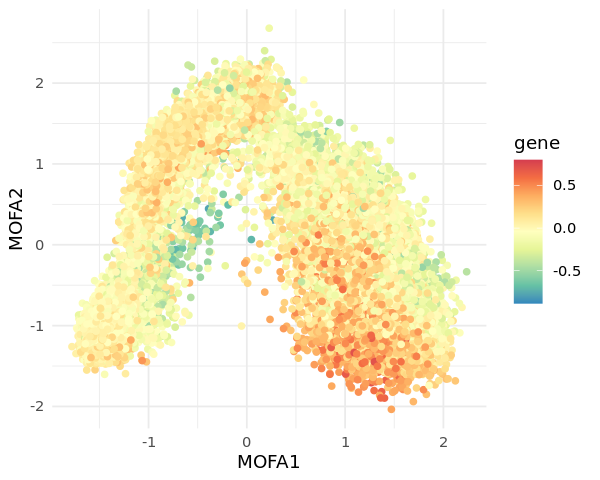

Joining, by = "cells"


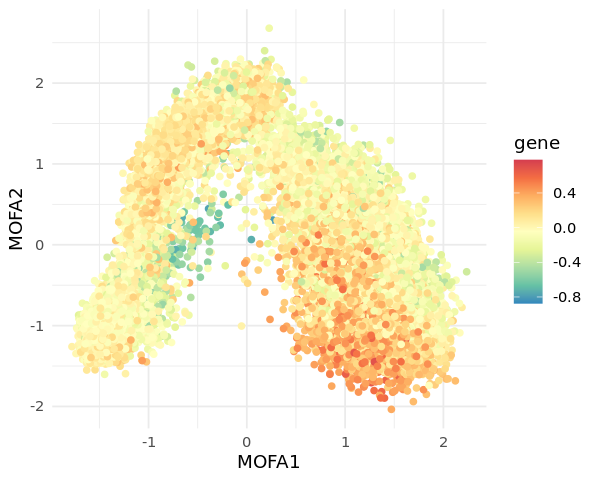

Joining, by = "cells"


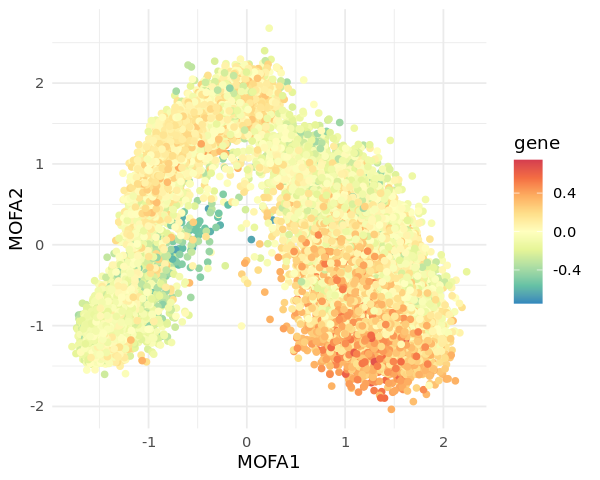

Joining, by = "cells"


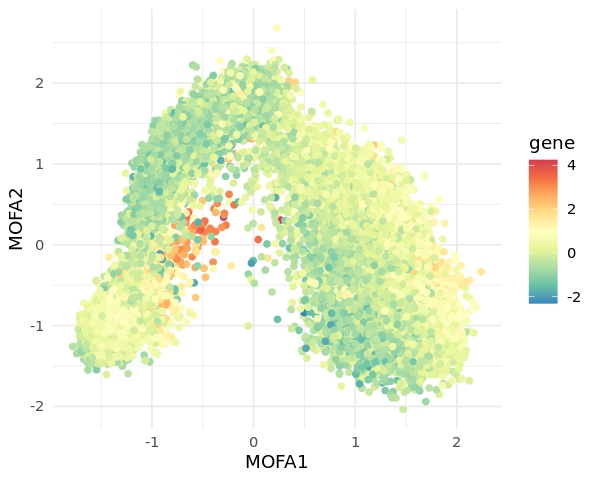

Joining, by = "cells"


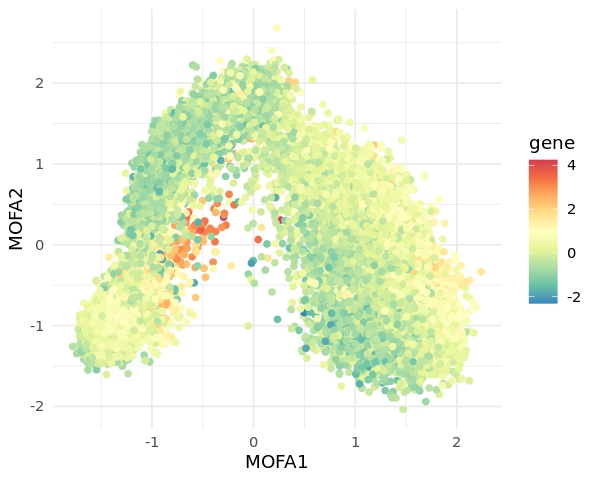

Joining, by = "cells"


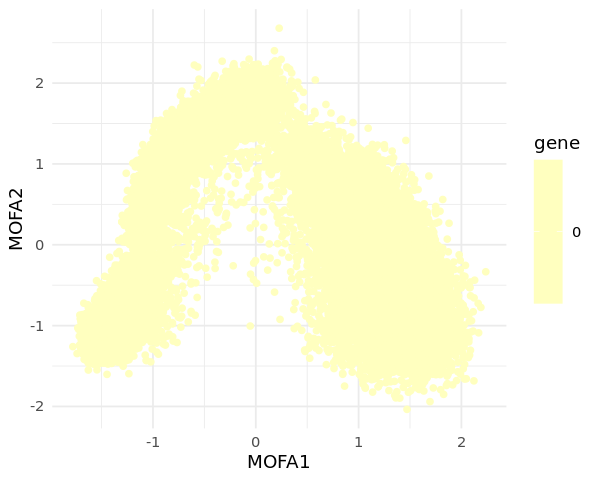

Joining, by = "cells"


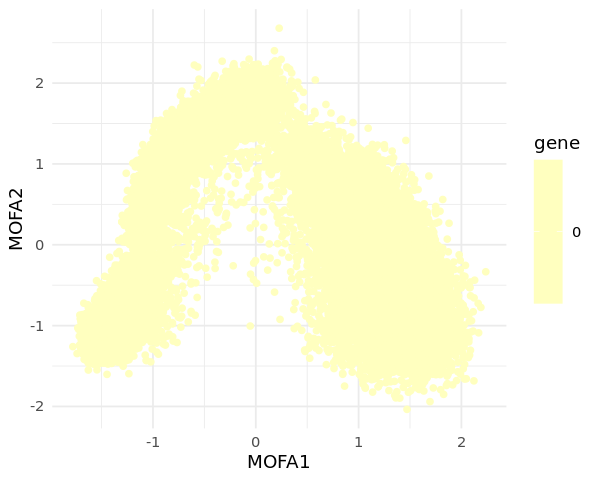

Joining, by = "cells"


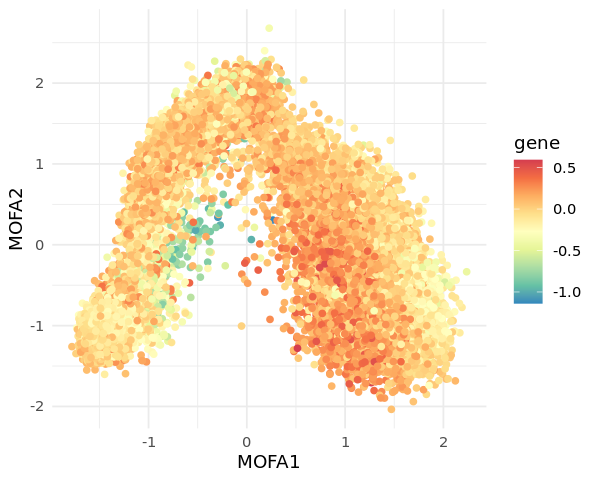

Joining, by = "cells"


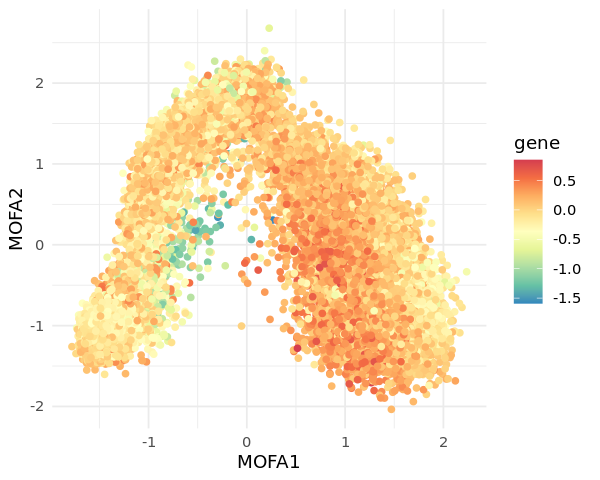

Joining, by = "cells"


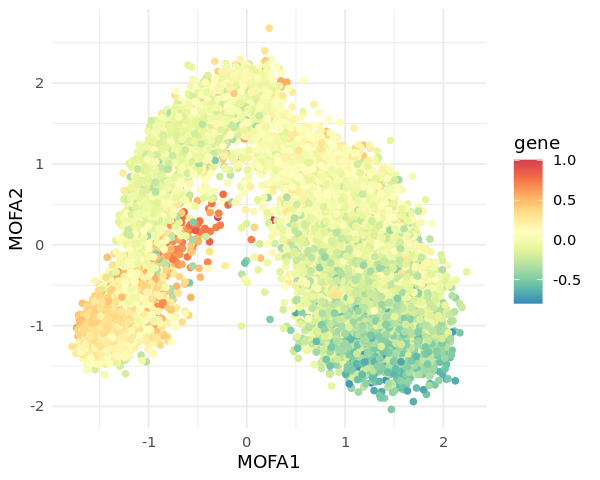

Joining, by = "cells"


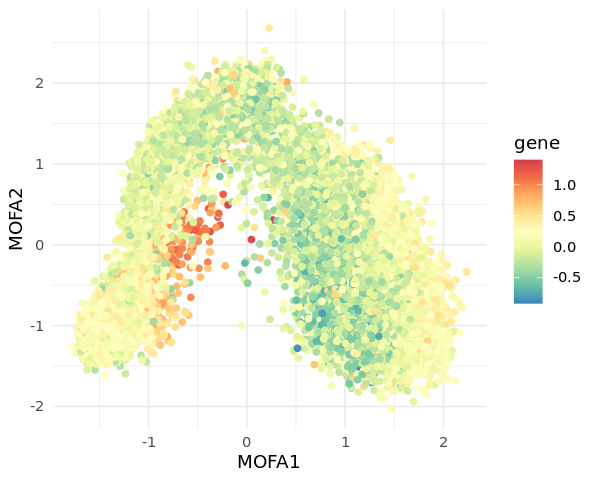

Joining, by = "cells"


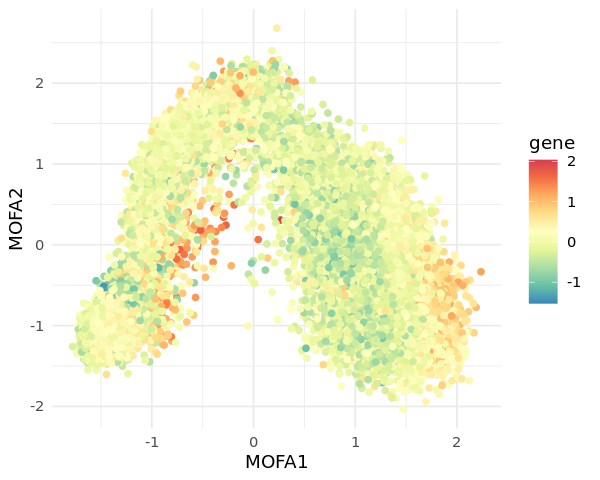

Joining, by = "cells"


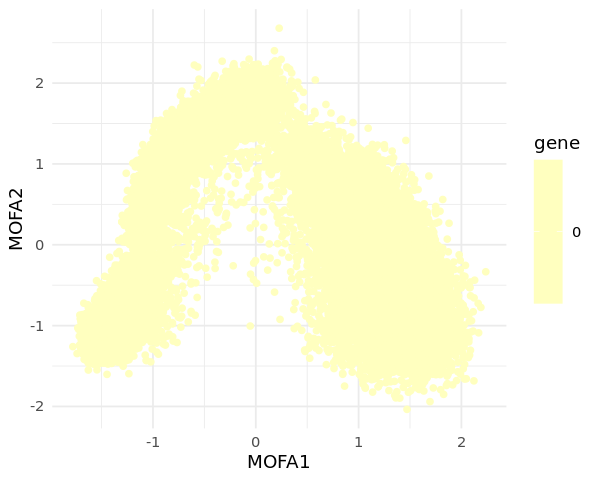

Joining, by = "cells"


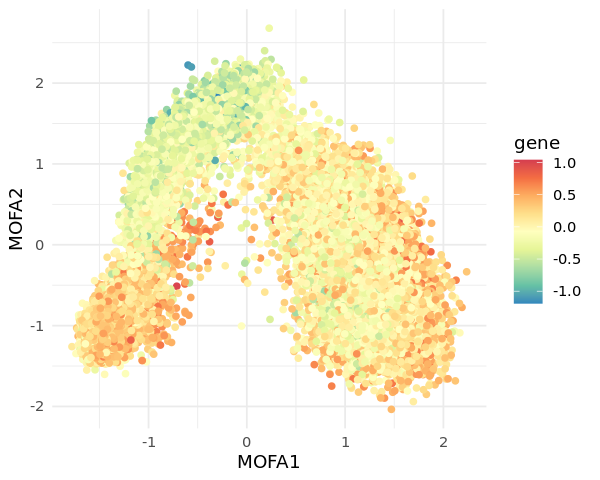

Joining, by = "cells"


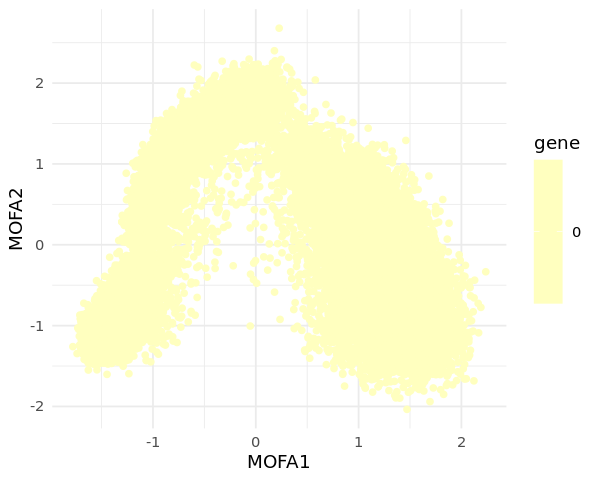

Joining, by = "cells"


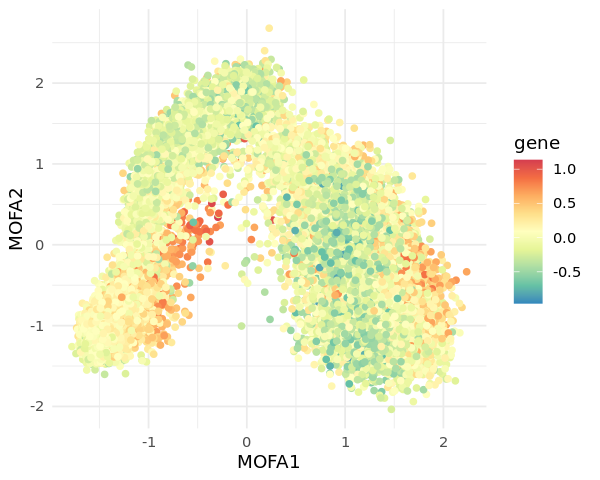

Joining, by = "cells"


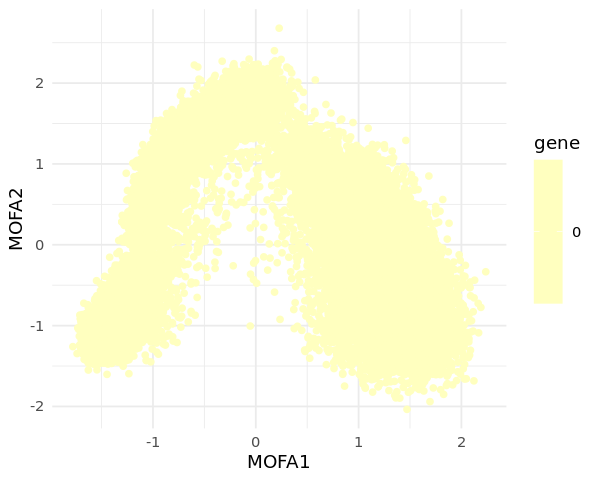

Joining, by = "cells"


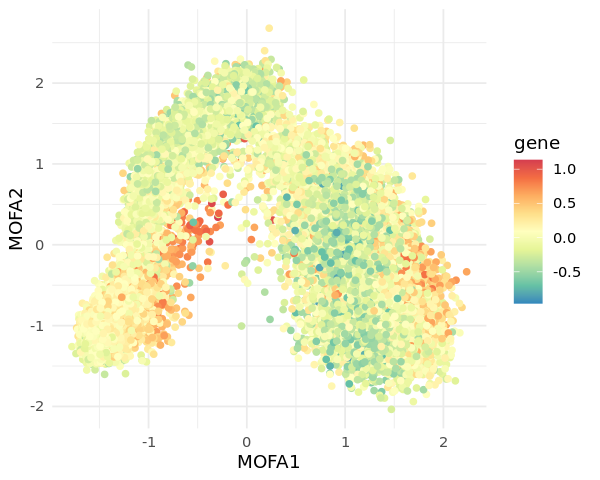

Joining, by = "cells"


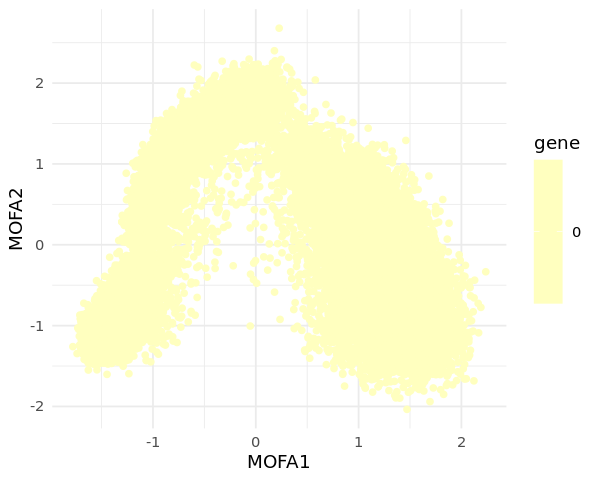

Joining, by = "cells"


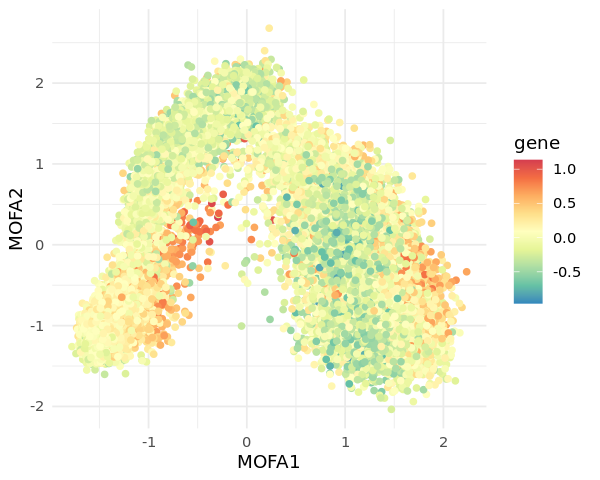

Joining, by = "cells"


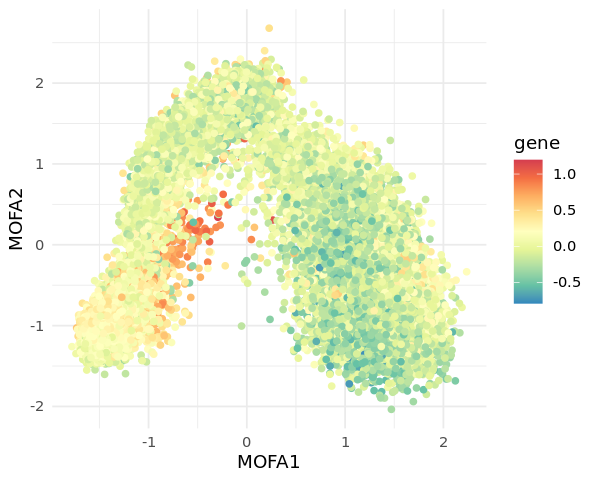

Joining, by = "cells"


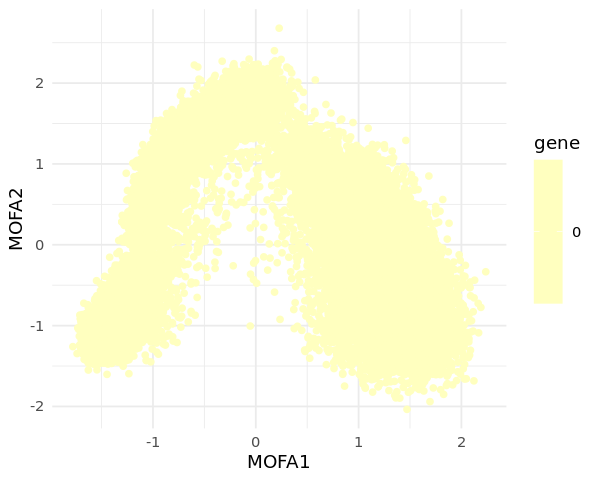

Joining, by = "cells"


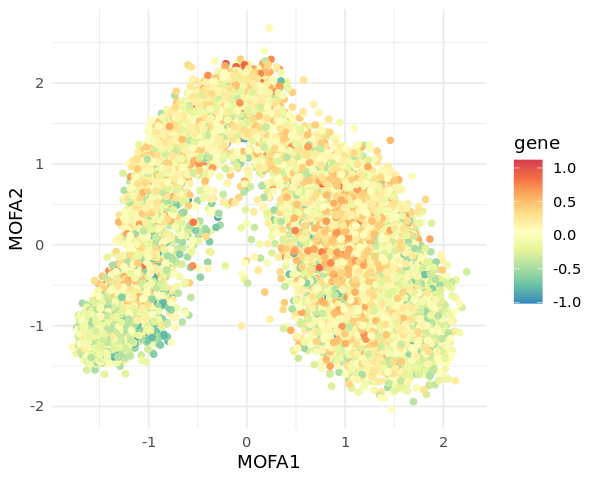

Joining, by = "cells"


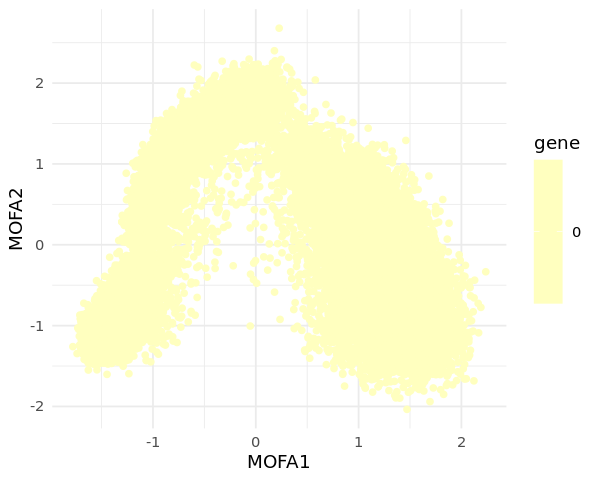

Joining, by = "cells"


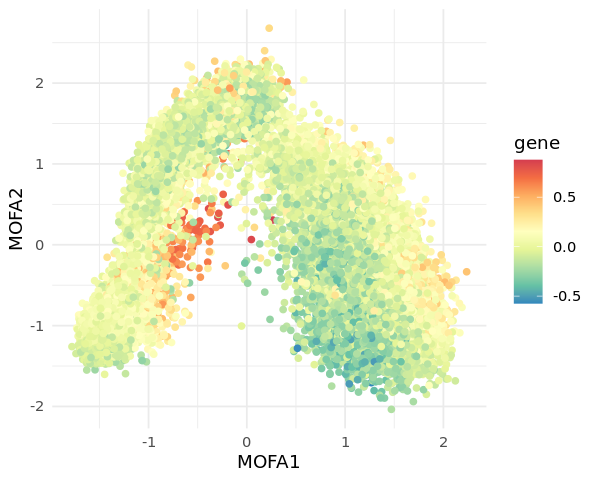

Joining, by = "cells"


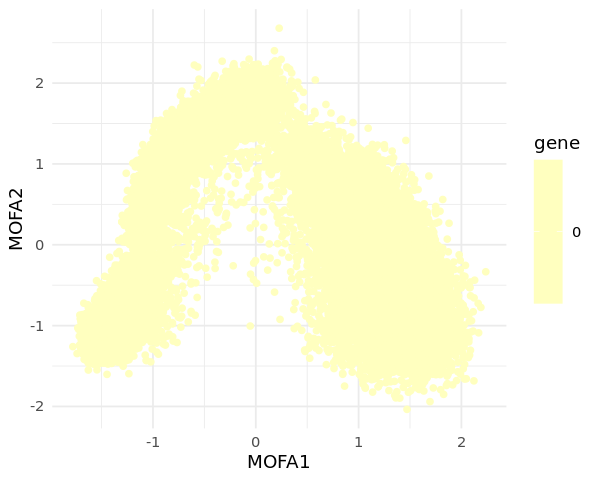

Joining, by = "cells"


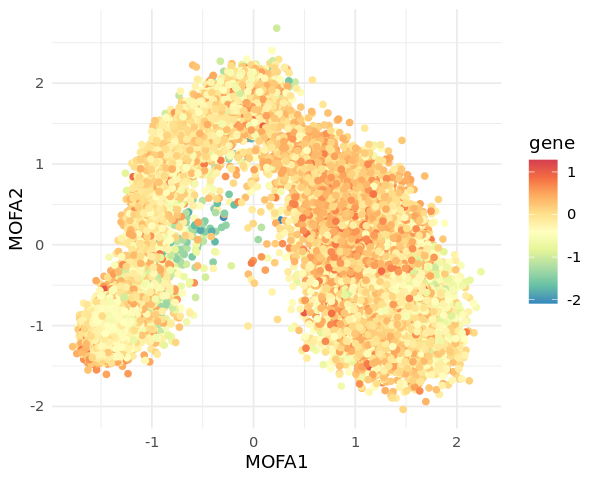

Joining, by = "cells"


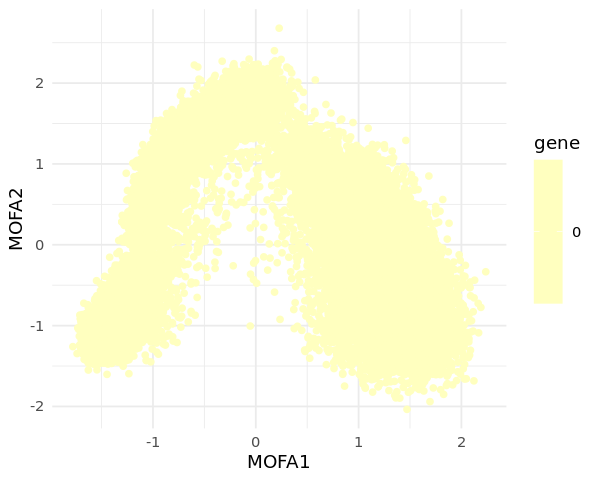

Joining, by = "cells"


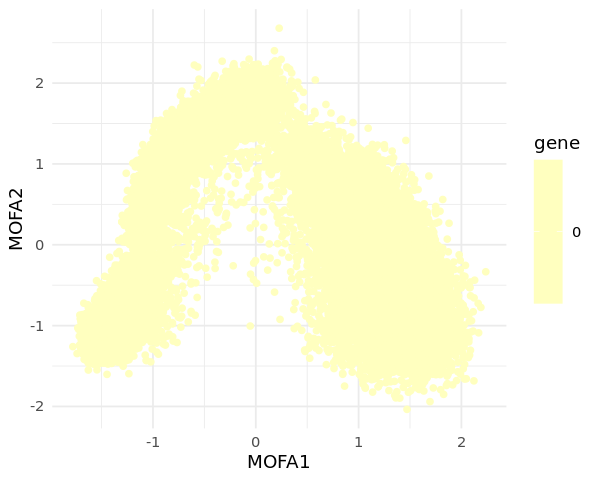

Joining, by = "cells"


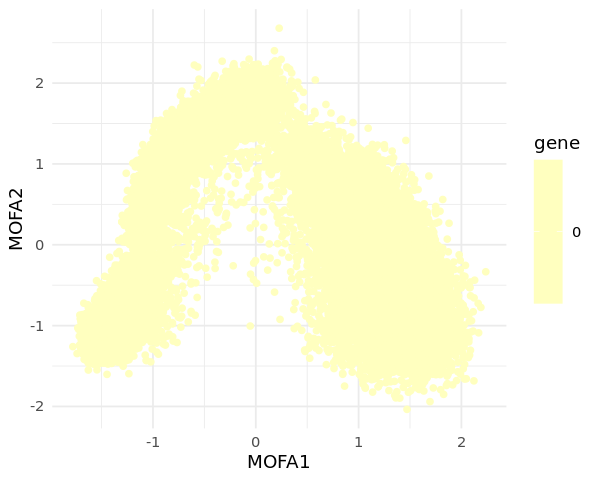

Joining, by = "cells"


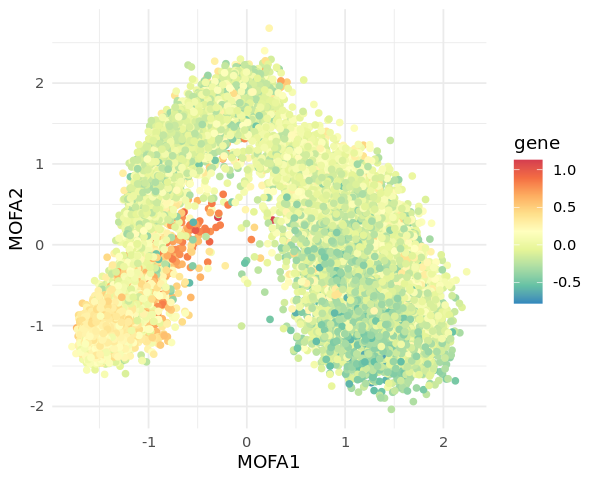

Joining, by = "cells"


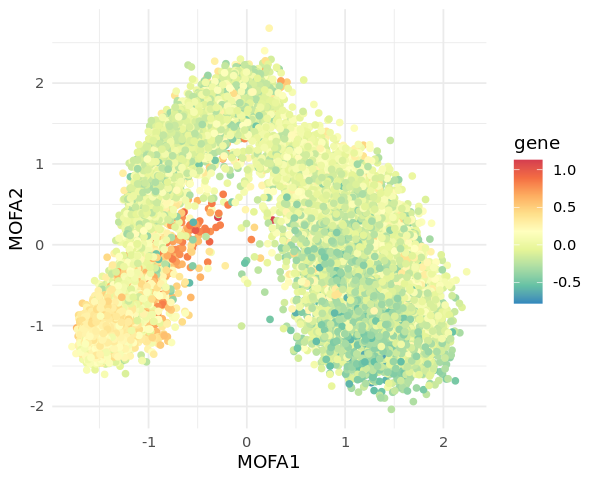

Joining, by = "cells"


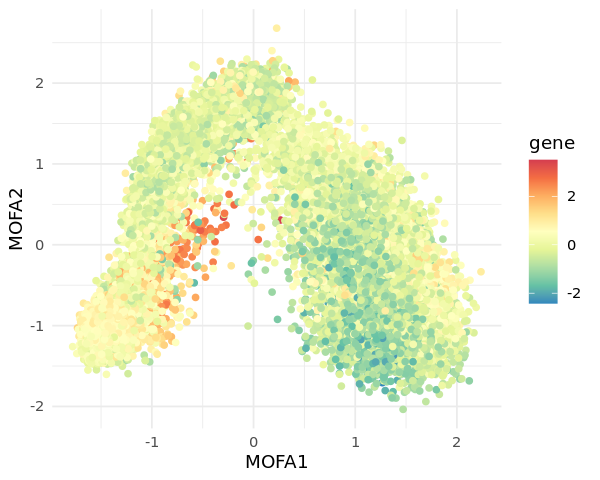

Joining, by = "cells"


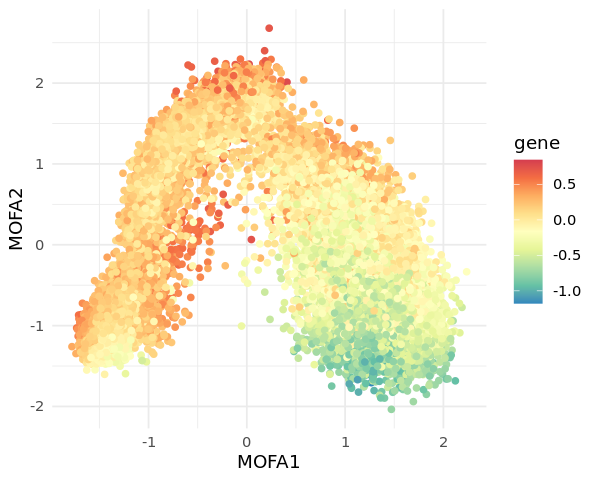

Joining, by = "cells"


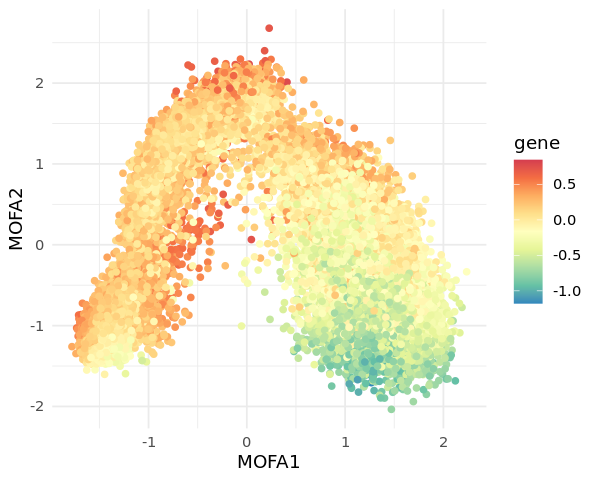

Joining, by = "cells"


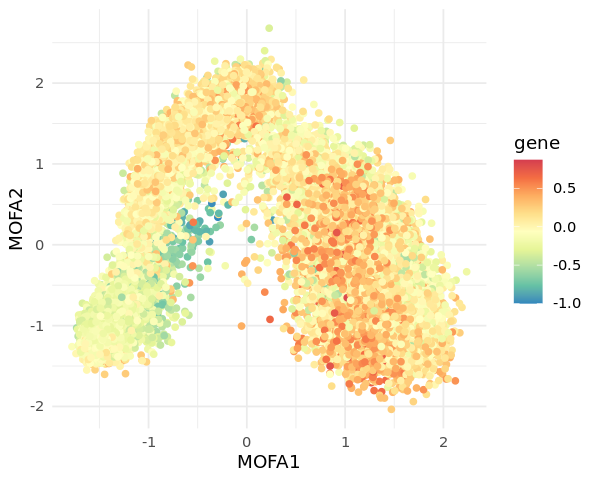

Joining, by = "cells"


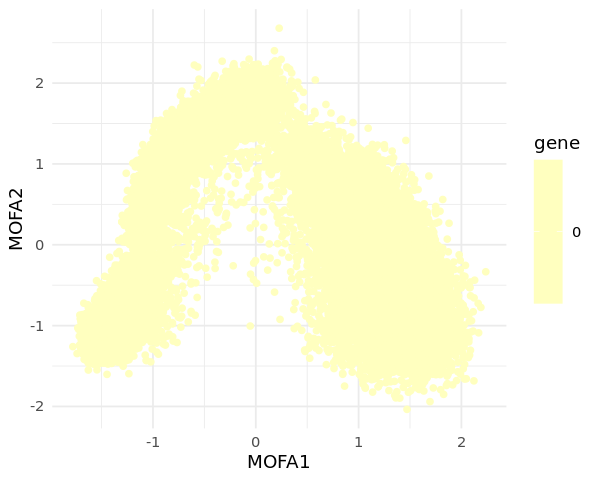

Joining, by = "cells"


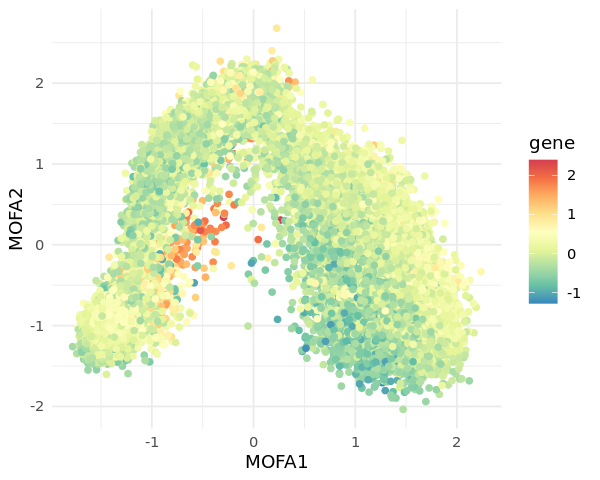

Joining, by = "cells"


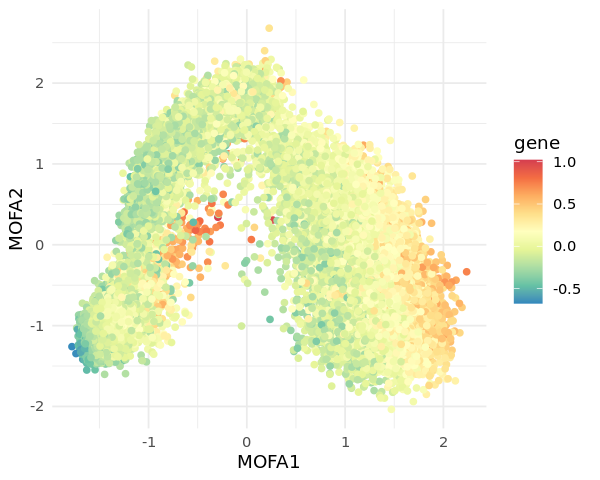

Joining, by = "cells"


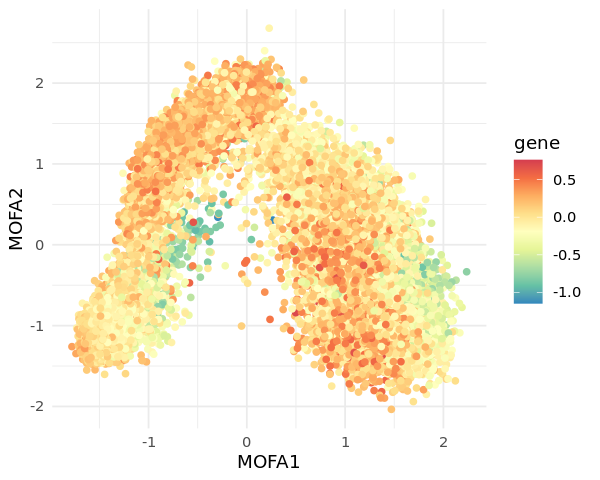

Joining, by = "cells"


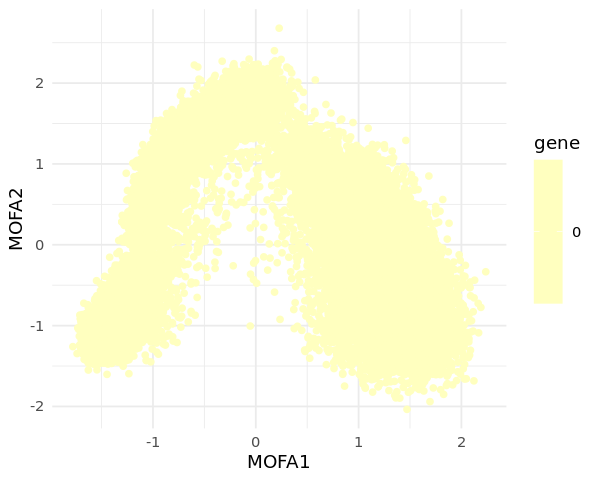

Joining, by = "cells"


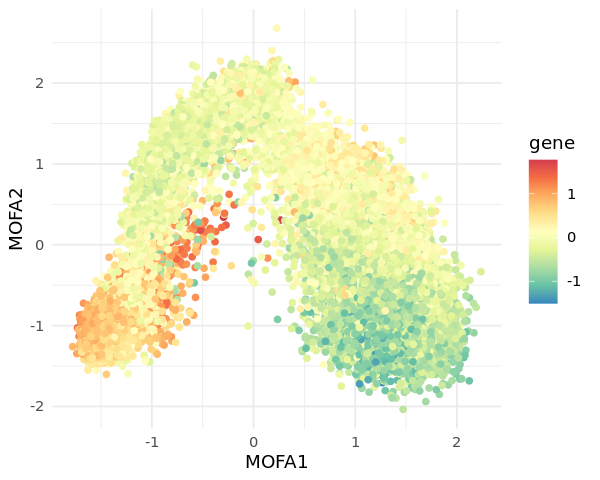

Joining, by = "cells"


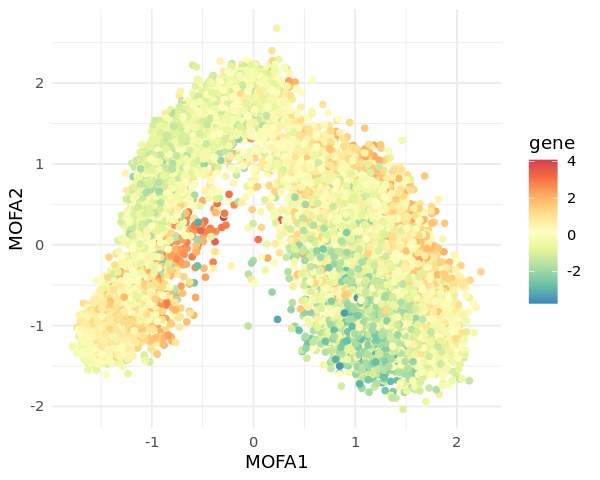

Joining, by = "cells"


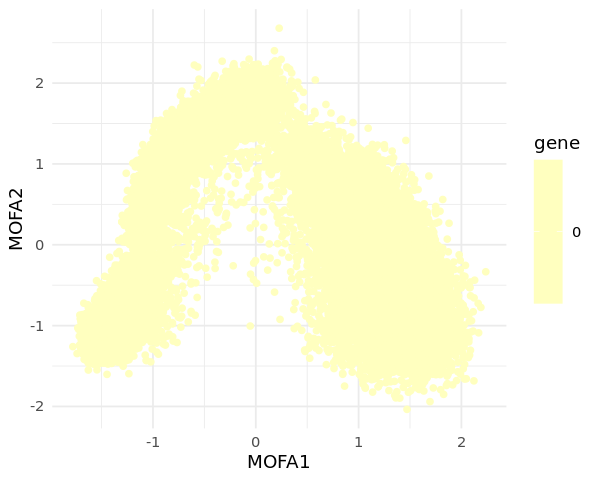

Joining, by = "cells"


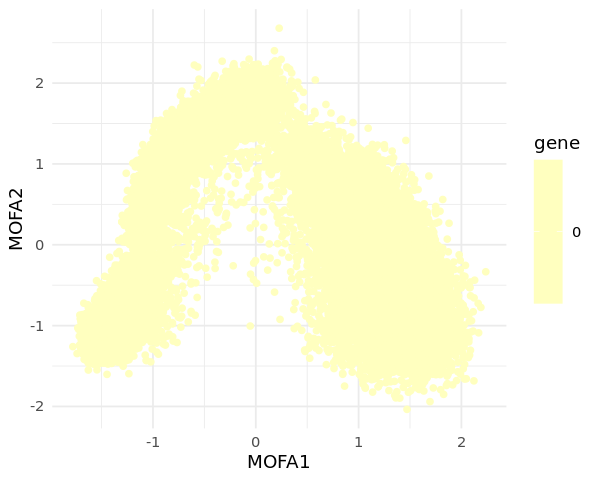

Joining, by = "cells"


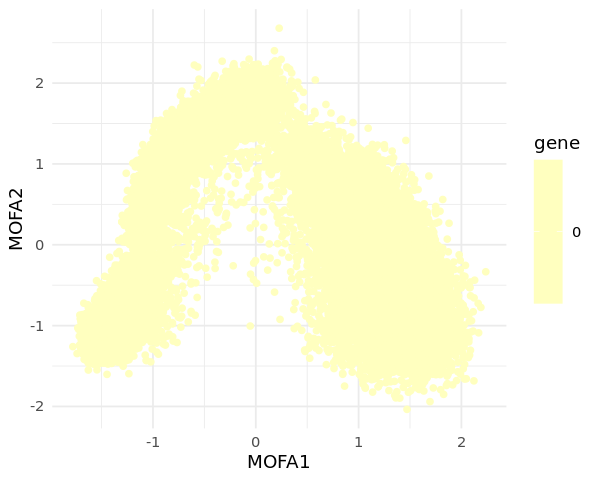

Joining, by = "cells"


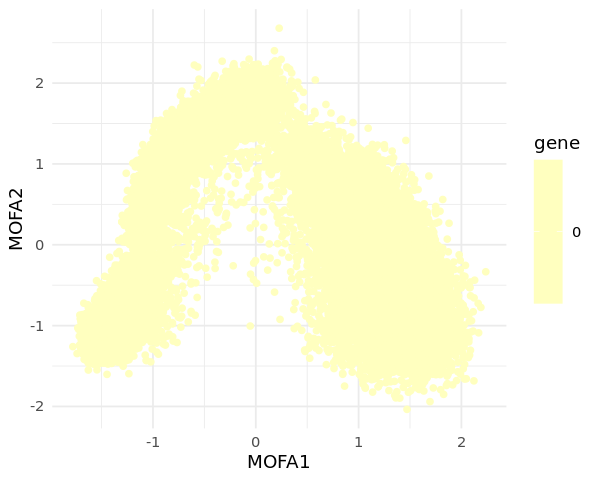

Joining, by = "cells"


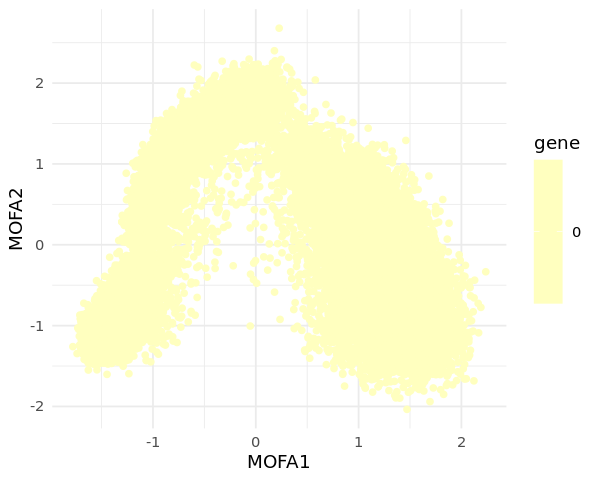

Joining, by = "cells"


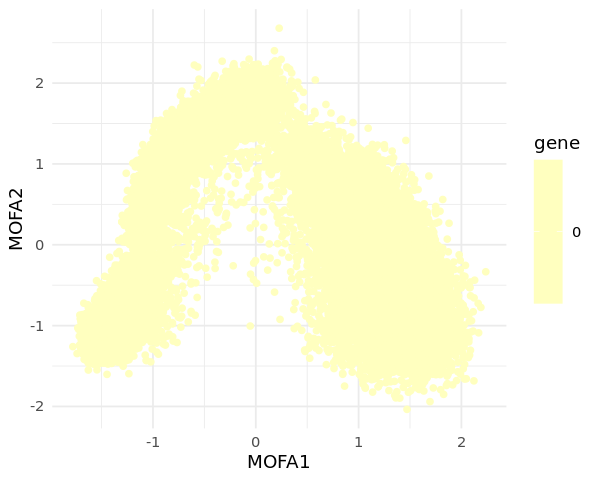

Joining, by = "cells"


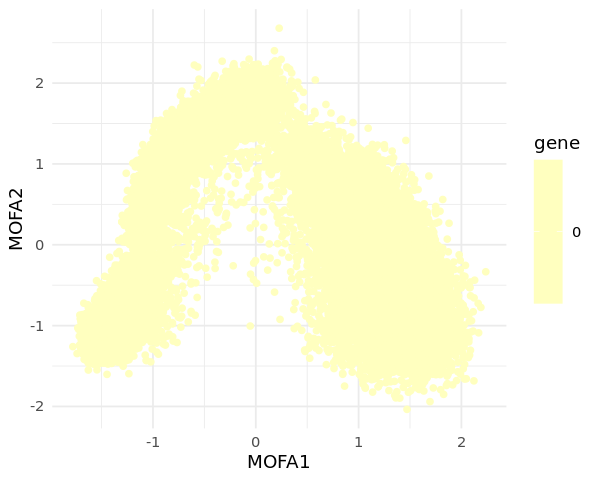

Joining, by = "cells"


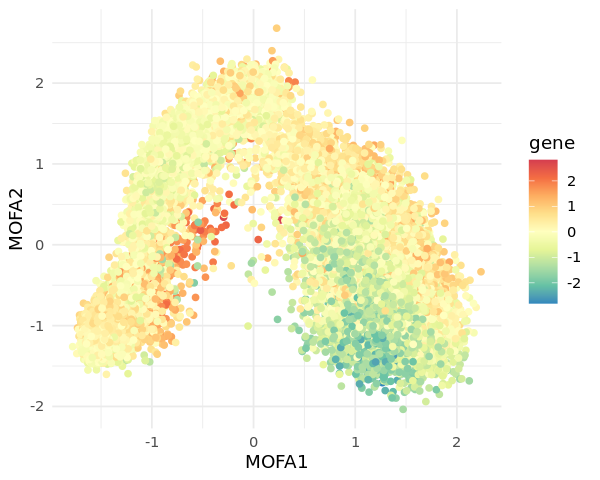

Joining, by = "cells"


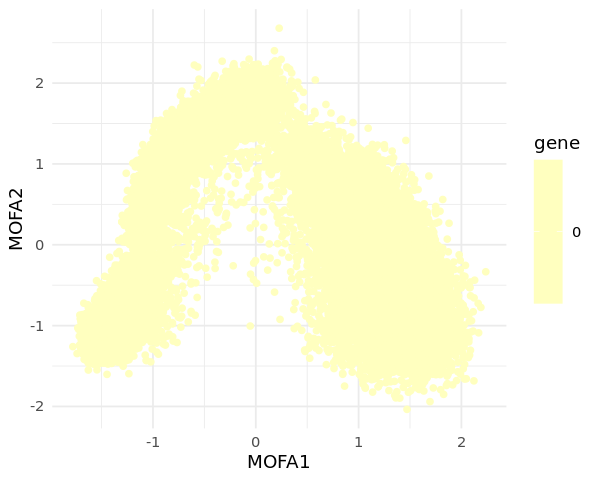

Joining, by = "cells"


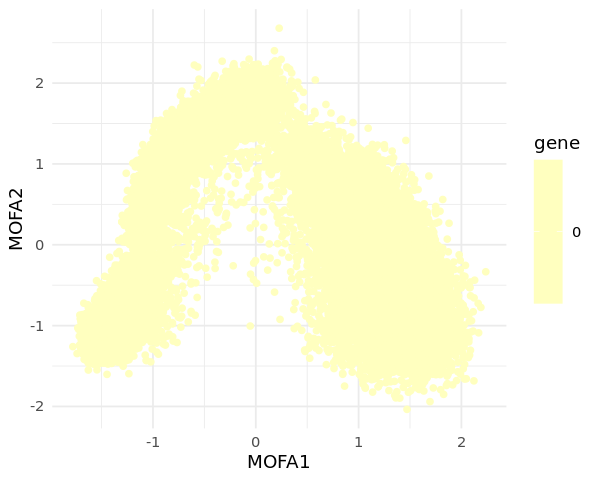

Joining, by = "cells"


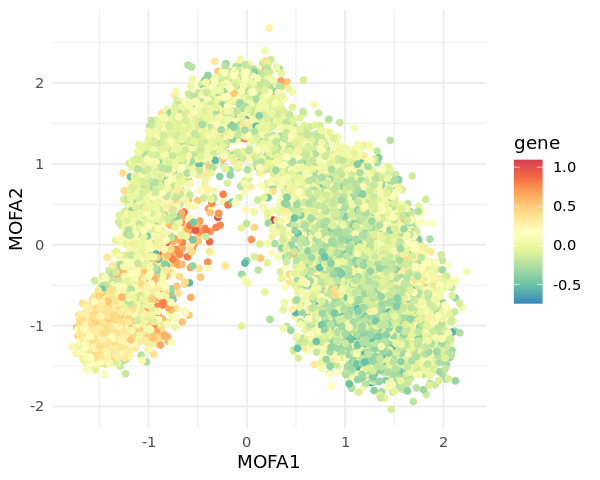

Joining, by = "cells"


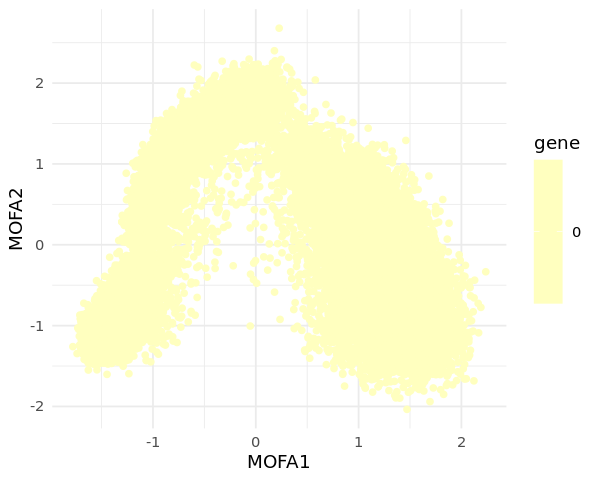

Joining, by = "cells"


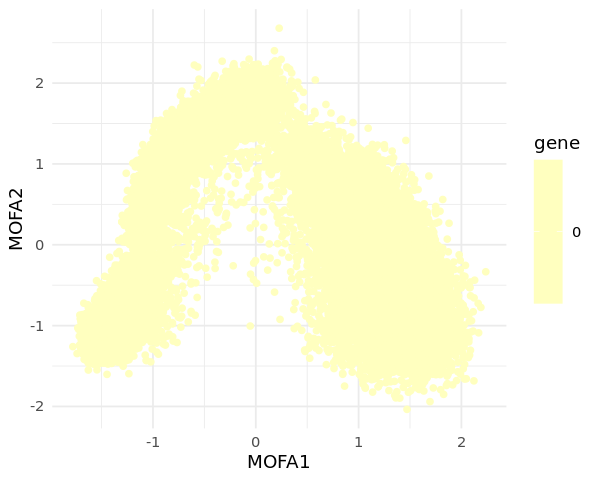

Joining, by = "cells"


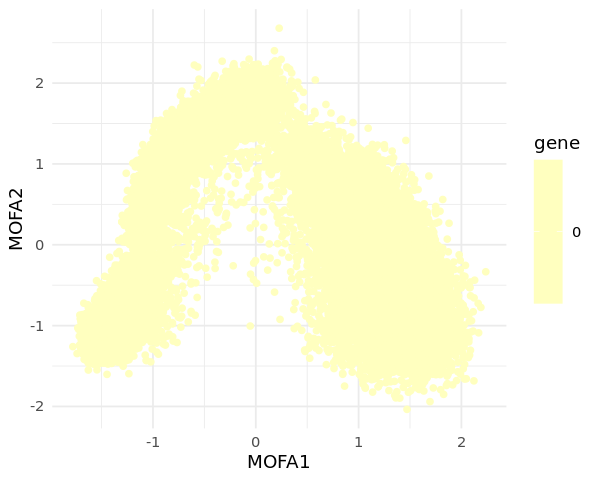

Joining, by = "cells"


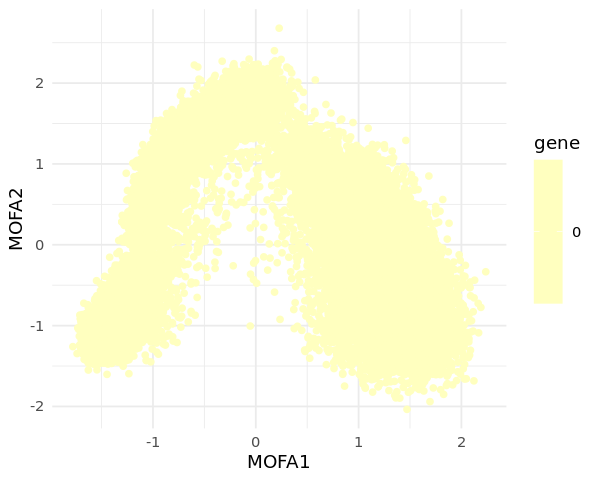

Joining, by = "cells"


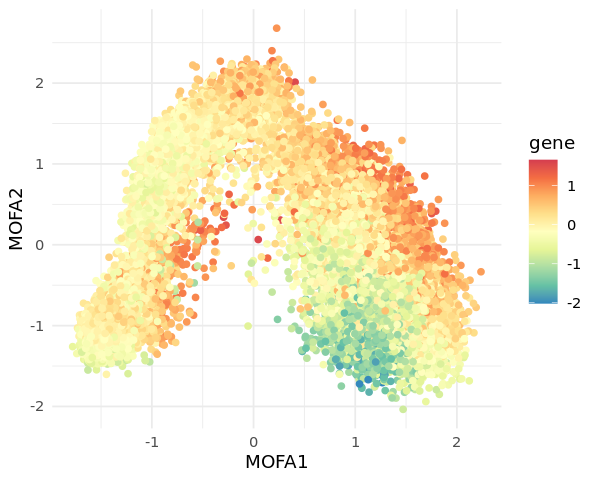

Joining, by = "cells"


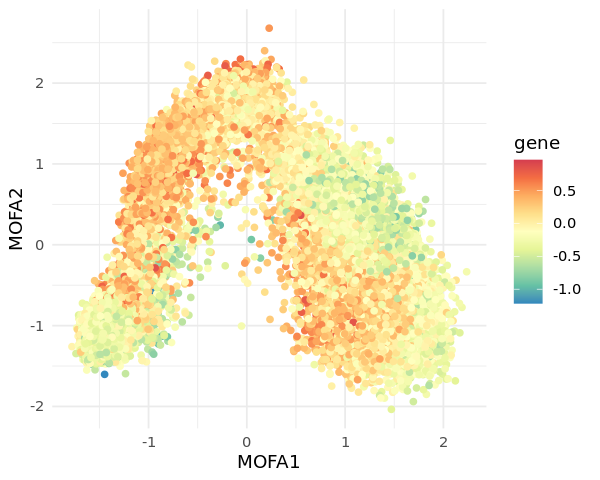

ERROR: Error in `[.data.frame`(df1, , i + 1): undefined columns selected


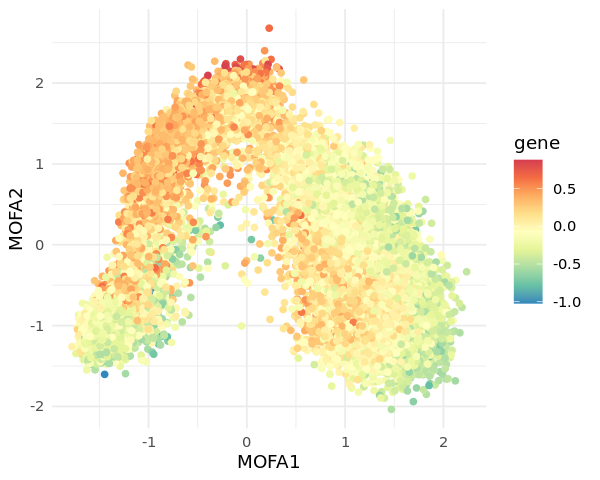

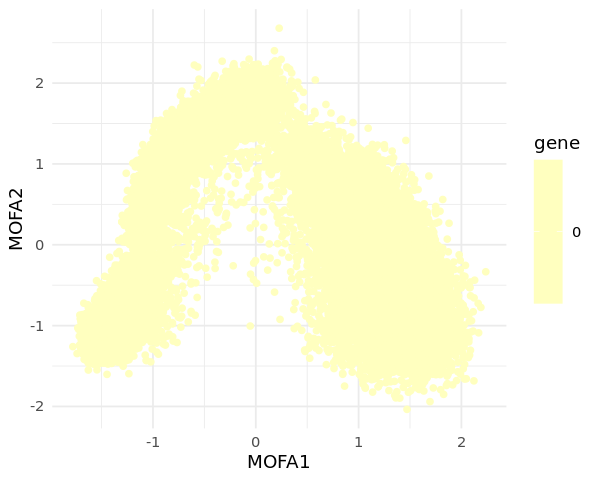

In [40]:
options(repr.plot.width=5, repr.plot.height=4)
for (i in 1:ncol(df1)){
    df2 = inner_join(df0, data.frame(cells = df1$cells, gene = df1[,i+1]))
    p = ggplot(df2, aes(x = MOFA1, y = MOFA2, colour = gene)) + geom_point()
    p = p + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
    print (p + theme_minimal())
}